In [4]:
import numpy as np
import matplotlib.pyplot as plt

#  Linear Regression

## Closed Form

In [3]:
#Generate data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

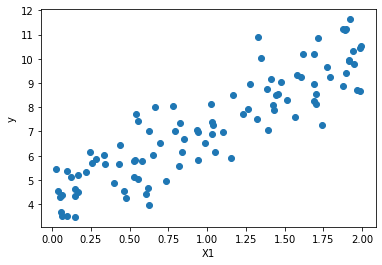

In [9]:
plt.scatter(X,y)
plt.xlabel("X1")
plt.ylabel("y")
plt.show()

In [10]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [11]:
theta_best

array([[4.212281  ],
       [2.98292189]])

In [12]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance

In [13]:
y_predict = X_new_b.dot(theta_best)

In [14]:
y_predict

array([[ 4.212281  ],
       [10.17812477]])

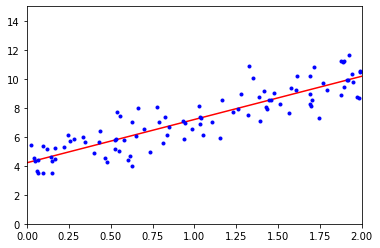

In [15]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lin_reg = LinearRegression()

In [18]:
lin_reg.fit(X, y)

LinearRegression()

In [19]:
lin_reg.intercept_, lin_reg.coef_

(array([4.212281]), array([[2.98292189]]))

In [20]:
lin_reg.predict(X_new)

array([[ 4.212281  ],
       [10.17812477]])

In [21]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [22]:
theta_best_svd

array([[4.212281  ],
       [2.98292189]])

In [23]:
np.linalg.pinv(X_b).dot(y)

array([[4.212281  ],
       [2.98292189]])

## Gradient Descent

In [24]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

In [25]:
theta = np.random.randn(2,1) # random initialization

In [26]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [27]:
theta

array([[4.212281  ],
       [2.98292189]])

### Stochastic Gradient Descent using a simple learning schedule

In [28]:

n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)

In [29]:
theta = np.random.randn(2,1) # random initialization

In [30]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [32]:
theta

array([[4.19474816],
       [3.02707222]])

In [33]:
from sklearn.linear_model import SGDRegressor

In [34]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)

In [35]:
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [36]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.14819583]), array([2.93504258]))

# Polynomial Regression

In [37]:
m = 100

In [38]:
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

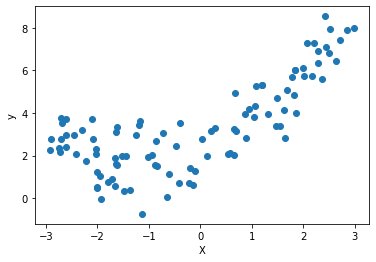

In [41]:
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [42]:
from sklearn.preprocessing import PolynomialFeatures

In [43]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [44]:
X_poly = poly_features.fit_transform(X)

In [45]:
X[0]

array([0.54577595])

In [46]:
X_poly[0]

array([0.54577595, 0.29787138])

In [47]:
lin_reg = LinearRegression()

In [48]:
lin_reg.fit(X_poly, y)

LinearRegression()

In [49]:
lin_reg.intercept_, lin_reg.coef_

(array([2.21201029]), array([[0.94493233, 0.40631265]]))

In [51]:
y_pred = lin_reg.predict(X_poly)

In [59]:
X_new = np.array([[-3], [3]])

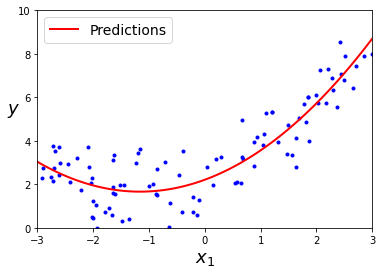

In [64]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.legend(loc="upper left", fontsize=14)

plt.axis([-3, 3, 0, 10])

plt.show()

# Learning Curves

In [76]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [77]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.legend(loc="upper right", fontsize=14)

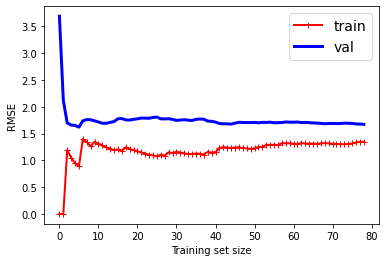

In [78]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [79]:
from sklearn.pipeline import Pipeline

In [80]:
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

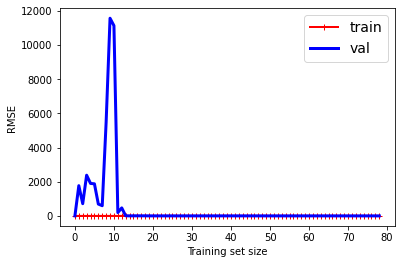

In [81]:
plot_learning_curves(polynomial_regression, X, y)

# Regularization

## Ridge Regression

In [82]:
#closed form
from sklearn.linear_model import Ridge

In [83]:
ridge_reg = Ridge(alpha=1, solver="cholesky")

In [84]:
ridge_reg.fit(X, y)

Ridge(alpha=1, solver='cholesky')

In [85]:
ridge_reg.predict([[1.5]])

array([[4.81177943]])

In [86]:
#SGD
sgd_reg = SGDRegressor(penalty="l2")

In [87]:
sgd_reg.fit(X, y.ravel())

SGDRegressor()

In [88]:
sgd_reg.predict([[1.5]])

array([4.77083649])

## Lasso regression

In [89]:
from sklearn.linear_model import Lasso

In [90]:
lasso_reg = Lasso(alpha=0.1)

In [91]:
lasso_reg.fit(X, y)

Lasso(alpha=0.1)

In [92]:
lasso_reg.predict([[1.5]])

array([4.7632271])

In [93]:
sgd_reg = SGDRegressor(penalty="l1")

In [94]:
sgd_reg.fit(X, y.ravel())

SGDRegressor(penalty='l1')

In [95]:
sgd_reg.predict([[1.5]])

array([4.79040639])

## Elastic Net

In [96]:
from sklearn.linear_model import ElasticNet

In [97]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [98]:
elastic_net.fit(X, y)

ElasticNet(alpha=0.1)

In [99]:
elastic_net.predict([[1.5]])

array([4.76691644])

## Early stopping

In [102]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

In [105]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [106]:
# prepare the data
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

In [107]:
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

In [108]:
sgd_reg = SGDRegressor(
    max_iter=1, 
    tol=-np.infty, 
    warm_start=True, 
    penalty=None, 
    learning_rate="constant", 
    eta0=0.0005
)

In [109]:
minimum_val_error = float("inf")
best_epoch = None
best_model = None

In [115]:
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.reshape(y_train.shape[0],)) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

# Logistic regression

In [116]:
from sklearn import datasets

In [117]:
iris = datasets.load_iris()

In [118]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [119]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris virginica, else 0

In [120]:
from sklearn.linear_model import LogisticRegression

In [121]:
log_reg = LogisticRegression()

In [122]:
log_reg.fit(X, y)

LogisticRegression()

In [123]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

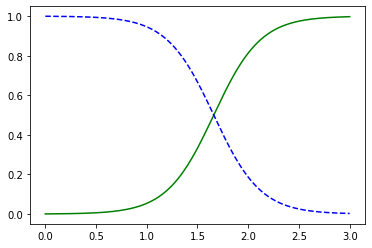

In [124]:
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")

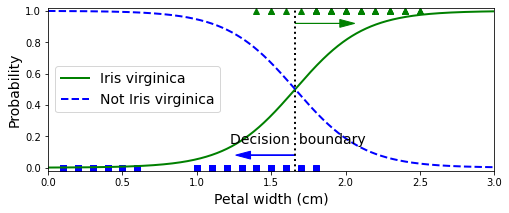

In [125]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))

plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")

plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')

plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)

plt.legend(loc="center left", fontsize=14)

plt.axis([0, 3, -0.02, 1.02])

plt.show()

## Softmax regression

In [126]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]

In [127]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)

In [128]:
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [129]:
softmax_reg.predict([[5, 2]])

array([2])

In [130]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])